In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

In [29]:
sales_df = pd.read_csv('../data/retail_sales.csv', index_col='date', parse_dates=True)
sales_df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


In [30]:
df = sales_df.reset_index()

In [31]:
df = df.rename(columns={'date':'ds', 'sales':'y'})
df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


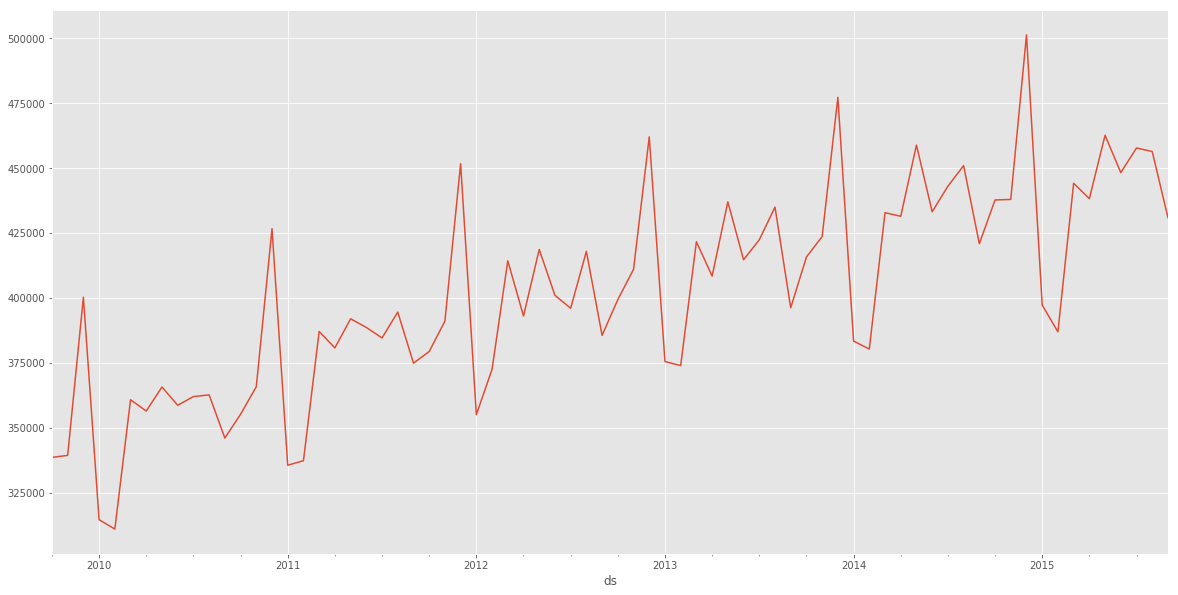

In [32]:
df.set_index('ds').y.plot()

In [33]:
df['y'] = np.log(df['y'])
df.tail()

,ds,y
67,2015-05-01,13.044650
68,2015-06-01,13.013060
69,2015-07-01,13.033991
70,2015-08-01,13.030993
71,2015-09-01,12.973671


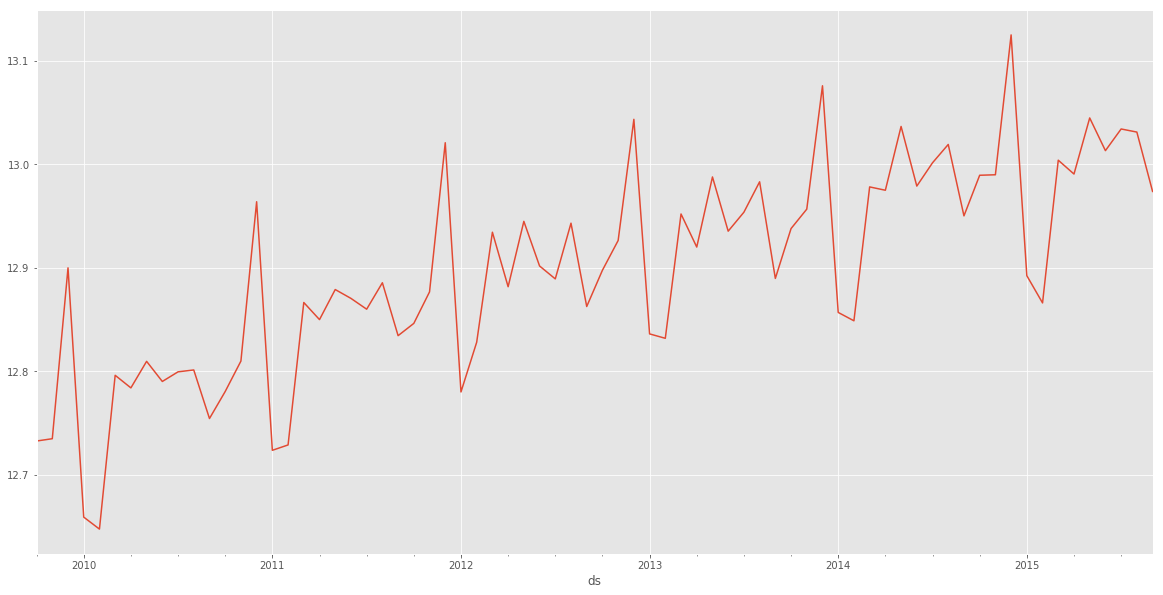

In [34]:
df.set_index('ds').y.plot()

In [35]:
model = Prophet()
model.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO: fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.

INFO: fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.

In [36]:
future = model.make_future_dataframe(periods=24, freq='m')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


In [37]:
forecast = model.predict(future)

In [38]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
91,2017-04-30,13.043150,12.938387,13.140040,12.959213,13.160581,0.020807,0.020807,0.020807,0.020807,0.020807,0.020807,0.020807,0.020807,0.020807,13.063957
92,2017-05-31,13.044821,12.931983,13.148432,12.946734,13.163228,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,13.056695
93,2017-06-30,13.046439,12.926499,13.160270,12.957919,13.191806,0.028729,0.028729,0.028729,0.028729,0.028729,0.028729,0.028729,0.028729,0.028729,13.075168
94,2017-07-31,13.048111,12.923382,13.173498,12.922643,13.173357,0.002902,0.002902,0.002902,0.002902,0.002902,0.002902,0.002902,0.002902,0.002902,13.051013
95,2017-08-31,13.049783,12.915830,13.184242,12.887747,13.159633,-0.026220,-0.026220,-0.026220,-0.026220,-0.026220,-0.026220,-0.026220,-0.026220,-0.026220,13.023563



- trend
- trend_tower
- trend_upper
- yhat_lower
- yhat_upper
- seasonal
- seasonal_lower
- seasonal_upper
- seasonalities
- seasonalities_lower
- seasonalities_upper
- yearly
- yearly_lower
- yearly_upper
- yhat

In [39]:
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,13.063957,12.959213,13.160581
92,2017-05-31,13.056695,12.946734,13.163228
93,2017-06-30,13.075168,12.957919,13.191806
94,2017-07-31,13.051013,12.922643,13.173357
95,2017-08-31,13.023563,12.887747,13.159633


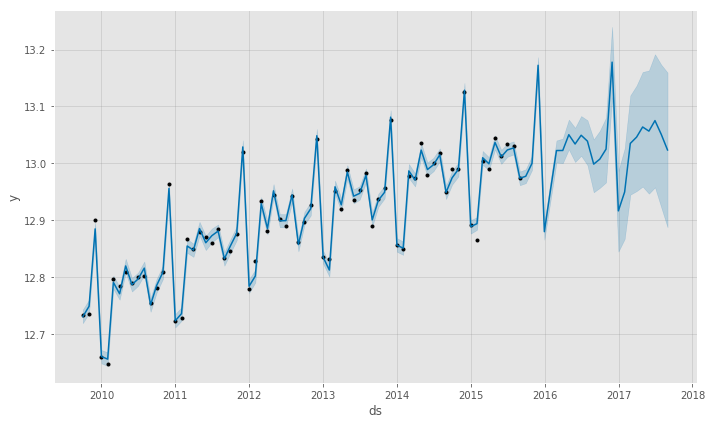

In [40]:
model.plot(forecast);

# Visualizing Prophet models

In [41]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [42]:
viz_df = sales_df.join(forecast[['yhat', 'yhat_lower', 'yhat_upper']], how='outer')

In [43]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper
2009-10-01,338630.0,12.730541,12.719107,12.743066
2009-11-01,339386.0,12.748841,12.736948,12.760339
2009-12-01,400264.0,12.884834,12.873050,12.896164
2010-01-01,314640.0,12.660503,12.648441,12.672021
2010-02-01,311022.0,12.655918,12.644122,12.667760


In [44]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [45]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper,yhat_rescaled
2009-10-01,338630.0,12.730541,12.719107,12.743066,337912.048683
2009-11-01,339386.0,12.748841,12.736948,12.760339,344152.886638
2009-12-01,400264.0,12.884834,12.873050,12.896164,394286.841134
2010-01-01,314640.0,12.660503,12.648441,12.672021,315055.276573
2010-02-01,311022.0,12.655918,12.644122,12.667760,313613.797752


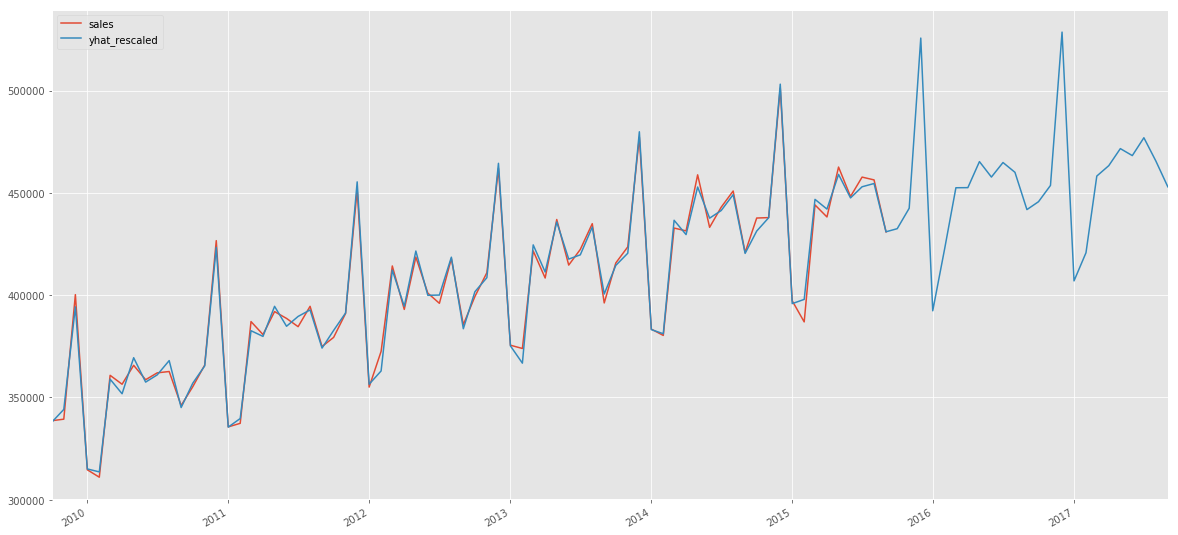

In [47]:
viz_df[['sales', 'yhat_rescaled']].plot()

In [48]:
sales_df.index = pd.to_datetime(sales_df.index)
connect_date = sales_df.index[-2]

In [49]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [50]:
predict_df.head()

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,
2015-09-01,13.010416,13.010416,13.010416,12.961590,12.985620,-0.036590,-0.036590,-0.036590,-0.036590,-0.036590,-0.036590,-0.036590,-0.036590,-0.036590,12.973826
2015-09-30,13.011980,13.011859,13.012184,12.965202,12.989615,-0.034654,-0.034654,-0.034654,-0.034654,-0.034654,-0.034654,-0.034654,-0.034654,-0.034654,12.977326
2015-10-31,13.013652,13.012029,13.015313,12.988387,13.013090,-0.013517,-0.013517,-0.013517,-0.013517,-0.013517,-0.013517,-0.013517,-0.013517,-0.013517,13.000135
2015-11-30,13.015270,13.010762,13.019176,13.159473,13.186695,0.157154,0.157154,0.157154,0.157154,0.157154,0.157154,0.157154,0.157154,0.157154,13.172424
2015-12-31,13.016941,13.009642,13.023837,12.865782,12.895211,-0.137004,-0.137004,-0.137004,-0.137004,-0.137004,-0.137004,-0.137004,-0.137004,-0.137004,12.879937


In [51]:
viz_df = sales_df.join(predict_df[['yhat', 'yhat_lower', 'yhat_upper']], how='outer')
viz_df['yhat_scaled'] = np.exp(viz_df['yhat'])

In [52]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper,yhat_scaled
2009-10-01,338630.0,NaN,NaN,NaN,NaN
2009-11-01,339386.0,NaN,NaN,NaN,NaN
2009-12-01,400264.0,NaN,NaN,NaN,NaN
2010-01-01,314640.0,NaN,NaN,NaN,NaN
2010-02-01,311022.0,NaN,NaN,NaN,NaN


In [53]:
viz_df.tail()

,sales,yhat,yhat_lower,yhat_upper,yhat_scaled
2017-04-30,NaN,13.063957,12.959213,13.160581,471633.086288
2017-05-31,NaN,13.056695,12.946734,13.163228,468220.448693
2017-06-30,NaN,13.075168,12.957919,13.191806,476950.682285
2017-07-31,NaN,13.051013,12.922643,13.173357,465567.826762
2017-08-31,NaN,13.023563,12.887747,13.159633,452961.815342


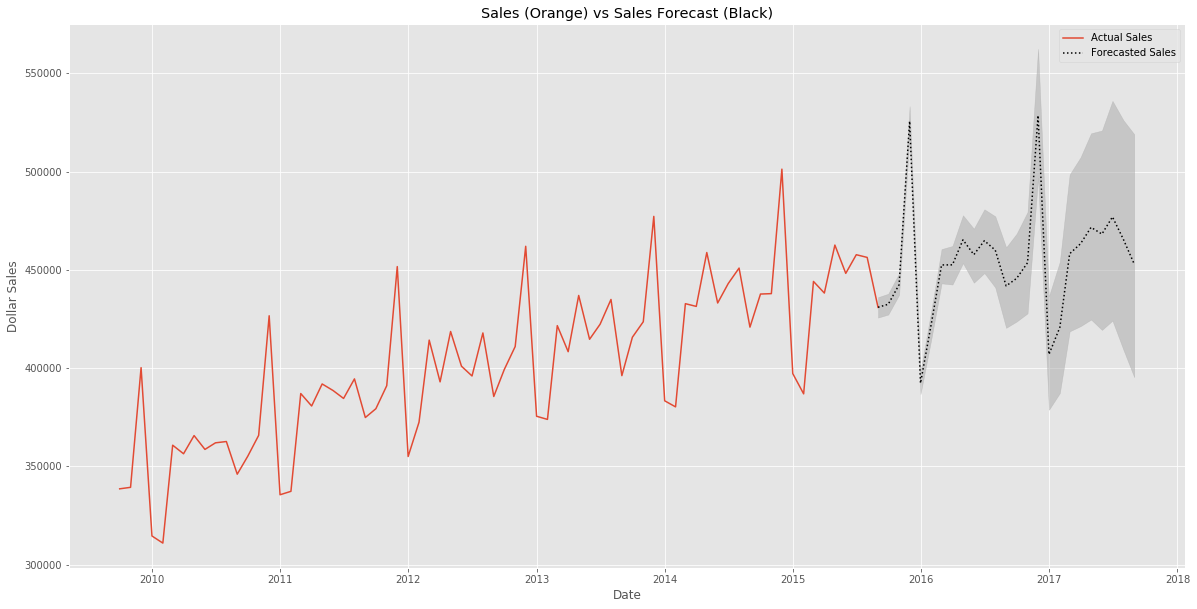

In [54]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.sales)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
ax1.set_ylabel('Dollar Sales')
ax1.set_xlabel('Date')

L = ax1.legend()
L.get_texts()[0].set_text('Actual Sales')
L.get_texts()[1].set_text('Forecasted Sales')